<h1>  Exploratory Data analysis </h1>
<h4> Author: Jakob Lindstrøm | Marie Mariussen</h4>
<h2> Content  </h2>
<ol>
    <li>Line plot and histograms for all variables</li>
    <lI> Auto correlation plot all variables </li>
    <li> Seasonal plot for target variable </li>
</ol>

<h2>  1. Importation and downloading </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf


In [2]:
df = pd.read_csv('Preprocessed_data.csv')

df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop(['Date'], axis=1, inplace=True)

print('Shape:', df.shape)
df.head()

Shape: (1200, 4)


,Salmon_exp_vol,FX_EURONOK,Interest_rate,Food_index
Date,,,,
2001-01-01,4089,8.2730,5.5,59.936571
2001-01-08,4959,8.2090,5.5,59.936571
2001-01-15,4610,8.2725,5.5,59.936571
2001-01-22,4470,8.2070,5.5,59.936571
2001-01-29,4523,8.1960,5.5,59.936571


<h2> 2. Line plot and histograms </h2>

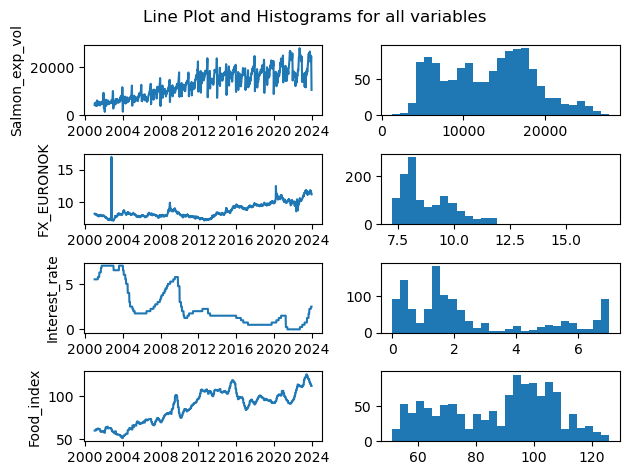

In [12]:
fig, ax  = plt.subplots(4,2)
for i in range(0,len(df.columns),1):
    ax[i,0].plot(df[df.columns[i]])
    ax[i,0].set_ylabel(df.columns[i])
    ax[i,1].hist(df[df.columns[i]], bins=27)
fig.suptitle('Line Plot and Histograms for all variables')

fig.tight_layout()
plt.show()

In [4]:
np.where(df['FX_EURONOK']==max(df['FX_EURONOK']))

(array([93], dtype=int64),)

<b> Discovery: </b> <p>The line plot for the currency variable seems to have one extreme outlier. The code below indicates the outlier occurs at week 93, in other words 30. Sept. 2002. Doublechcking facts shows that the actual value is close to 7.31.</p>

<h2> 3. Autocorrelation Plot

c:\Users\Jakob\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<bound method Figure.tight_layout of <Figure size 600x900 with 4 Axes>>

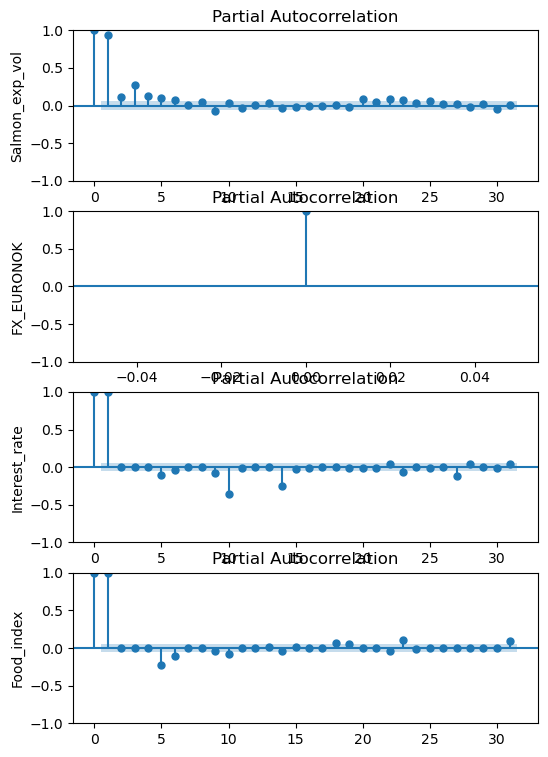

In [5]:
fig, ax  = plt.subplots(4, figsize=(6,9))
for i in range(0,len(df.columns),1):
    plot_pacf(df[df.columns[i]], ax=ax[i])
    ax[i].set_ylabel(df.columns[i])
fig.tight_layout
# plt.show()

<b> Discovery: </b>
<p> Salmon_exp_vol has serial correlation in lagged variables: 1,2,3 and 4. </p>
<p> FX_EURONOK... </p>
<p> Interest_rate has serial correlation in lagged variables: 1, 10 </p>
<p> Food_index har serial correlation in lagged variables: 1 and 5.

<h2> 4. Seasonal plot for target variable </h2>
<p> This code has been almost hard-copied from Kaggle course Timeseries: https://www.kaggle.com/code/ryanholbrook/seasonality </p>

<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

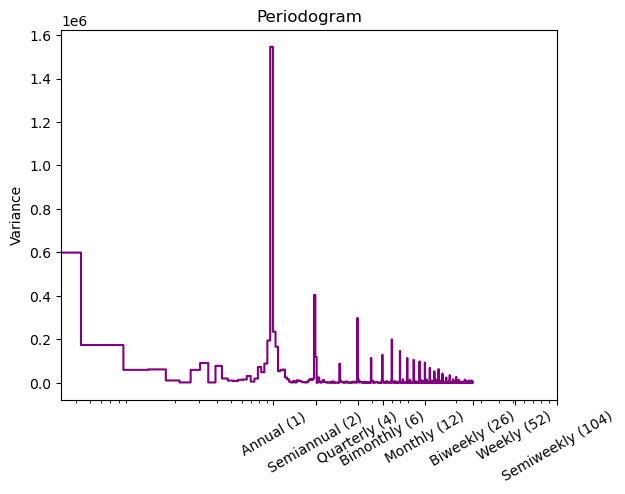

In [6]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("52W") / pd.Timedelta("1W")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


plot_periodogram(df['Salmon_exp_vol'])

<b> Discovery: </b>
<p>  The Salmon_exp_vol seems to have annual, semiannual and quarterly seasonality. </p>

<h2> 5. Heatmap for nan's

<AxesSubplot:xlabel='Date'>

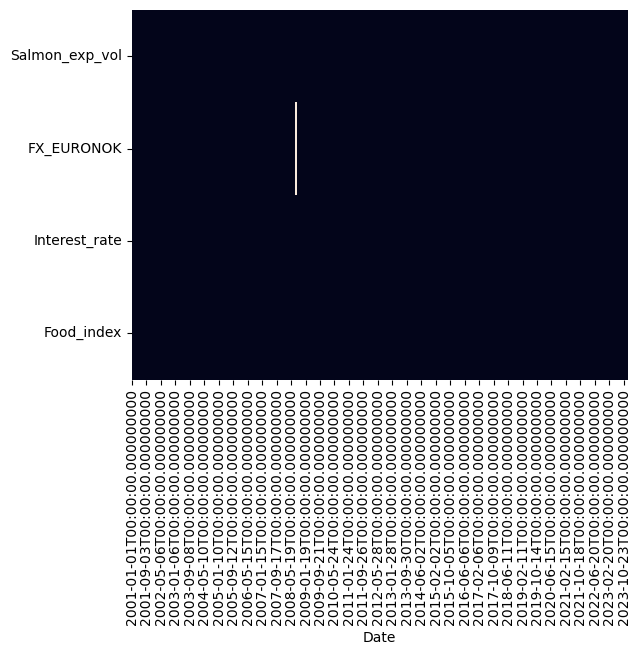

In [7]:
sns.heatmap(df.isna().transpose(),cbar=False)

In [8]:
df.iloc[394:400]

,Salmon_exp_vol,FX_EURONOK,Interest_rate,Food_index
Date,,,,
2008-07-21,7698,8.0805,4.5,79.247875
2008-07-28,8191,7.9992,4.5,79.247875
2008-08-04,8494,NaN,4.5,79.360116
2008-08-11,8681,NaN,4.5,79.360116
2008-08-18,9420,NaN,4.5,79.360116
2008-08-25,8947,7.9526,4.5,79.360116


<h2> 6. Salmon_vol_exp seasonal deepdive

<AxesSubplot:xlabel='Date'>

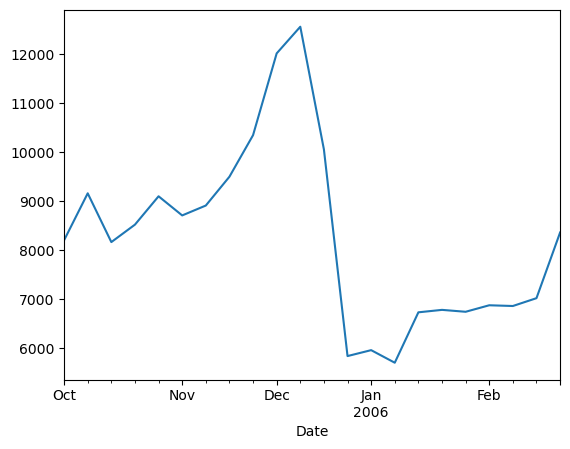

In [9]:
df['Salmon_exp_vol']['2005-10-01':'2006-02-28'].plot()

<b> Discovery: </b>
<p> It seems like the variable FX_EURONOK has nan values in the date index: 2008.08.14 to 2008.08.18. </p>

<h1> Periodogram explanatory variables

In [15]:
def norm(X):
    X = np.array(X)
    z = (X-X.mean())/X.std()
    return z

def annual_data(X, column=None):
    data = []
    for i in range(0,936,52):
        sel = X[column].iloc[i:i+52]
        data.append(sel)

    datacum = []
    for week in range(52):
        selcum = [data[year][week] for year in range(18)]
        datacum.append(np.mean(selcum))

    fig, ax = plt.subplots()
    for i in range(18):
        plt.plot(np.linspace(0,53,52),norm(data[i]), alpha=.3)
    plt.plot(np.linspace(0,53,52),norm(datacum), linewidth=2,color='r')
    plt.show()

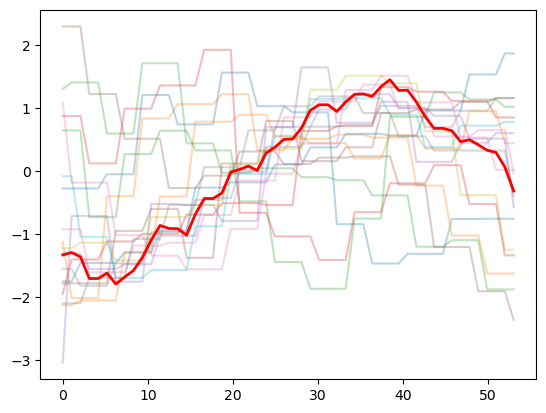

In [19]:
annual_data(df, column='Food_index')